<h1><center> <font color='green'>Term Project - Group No: 18</font> </center></h1>
<h1><center> <font color='blue'>Problem 1:Cantilever Beam Subjected to Uniformly Distributed Load</font> </center></h1>

1. <font color='green'>Group Members:</font>
    
    (1) Hitesh Patil (20ME63R21)<br>
    (2) Subal Sagar (20ME63R20)<br>
    (3) Baliram Kumar (20ME63R07)<br>
   
   
2. <font color='green'>Problem Statement:</font> We have taken a Cantilever Beam with $length = l$, $height = d$ and  $unit$ $width$  is taken subjected to uniformly distributed load of intensity $q_0$ $N/m$ all over the span of beam from free end to fixed end as shown in figure below. The cente of the axes is taken at free end of the beam on upper face of beam with positive $x$ axis pointing towards fixed end and positive $y$ axis directing towards upward.

 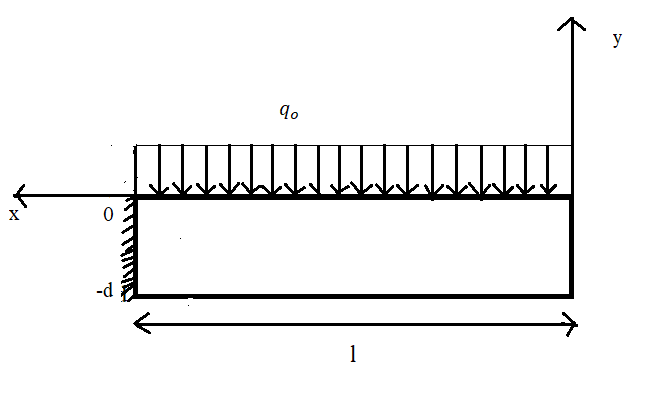

   Following analysis was undertaken on the given problem statement:
            
   (a) Calculation of normal and shear stress by assuming a 5th degree polynomial Airy's Stress Function with assuming general function at the beginning \begin{gather}\sigma_{xx} ,\ \sigma_{xy} ,\ \sigma_{yy}\end{gather} 
            
   (b) Calculation of strains using Hooke's law \begin{gather} \varepsilon_{xx},\ \varepsilon_{xy},\ \varepsilon_{yy} \end{gather} 
   
   (c) Finding a displacements values $u,v$ by strain displacement realations.
\begin{align}
u(x,y)\\
v(x,y)
\end{align}



<font color='green'>References used:</font>

    
    (a) "Elasticity Theory, applications and numericals" by Martin H.Sadd<br>
    (a) "Theory of Elasticity" by S. Timsoshenko and J.N. Goodier

<font color='green'>Assumption:</font><br>
    (a) Material should be homogeneous and isotropic<br>
    (b) Material should obey Hook's law<br>
    (c) Member is assumed to be prismatic<br>
    (d) Self Weight of beam is neglected<br>
    (e) Member is assumed to be ubder static equlibrium conditions



First we import Symbolic Python package and give a variable name as sym for further iteration

In [1]:
import sympy as sym

We define x and y symbol in further step

In [2]:
x,y = sym.symbols('x,y')

Now we define an 2nd order polynomial airy stress function

In [3]:
A20,A11, A02 = sym.symbols('A_20,A_11,A_02')
airy2 = A20*x**2 + A11*x*y + A02*y**2
display(airy2)

A_02*y**2 + A_11*x*y + A_20*x**2

Now we define an 3rd order polynomial airy stress function

In [4]:
A30,A21,A12,A03 = sym.symbols('A_30,A_21,A_12,A_03')
airy3 = A30*x**3 + A21*x**2*y + A12*x*y**2 + A03*y**3
display(airy3)

A_03*y**3 + A_12*x*y**2 + A_21*x**2*y + A_30*x**3

Now we define an 4th order polynomial airy stress function

In [5]:
A40,A31,A22,A13,A04 = sym.symbols('A_40,A_31,A_22,A_13,A_04')
airy4 = A40*x**4 + A31*x**3*y + A22*x**2*y**2 + A13*x*y**3 + A04*y**4
display(airy4)

A_04*y**4 + A_13*x*y**3 + A_22*x**2*y**2 + A_31*x**3*y + A_40*x**4

Now we define an 5th order polynomial airy stress function

In [6]:
A50,A41,A32,A23,A14,A05 = sym.symbols('A_50,A_41,A_32,A_23,A_14,A_05')
airy5 = A50*x**5 + A41*x**4*y + A32*x**3*y**2 + A23*x**2*y**3 + A14*x*y**4 + A05*y**5
display(airy5)

A_05*y**5 + A_14*x*y**4 + A_23*x**2*y**3 + A_32*x**3*y**2 + A_41*x**4*y + A_50*x**5

In [7]:
from IPython.display import Math, Latex

Now we define $\phi$ as our airy stress function with general coefficients by adding 2, 3, 4, 5 order polynomial 

In [8]:
phi= airy2 + airy3 + airy4 + airy5
display(Math(r'\phi = {}'.format(sym.latex(phi))))

<IPython.core.display.Math object>

<font color='green'>Now we solving for biharmonic equation $\nabla{^4}$ = 0</font>

In [9]:
biharm = (sym.diff(phi,(x,4))+2*sym.diff(phi,x,x,y,y)+sym.diff(phi,(y,4))).expand()
display(biharm)

24*A_04 + 120*A_05*y + 24*A_14*x + 8*A_22 + 24*A_23*y + 24*A_32*x + 24*A_40 + 24*A_41*y + 120*A_50*x

In first condition terms containing x are collected and equated to zero. Similarly y terms and constant terms equated to zero

In [10]:
biharm_x = biharm.coeff(x)
cond1 = sym.Eq(biharm_x,0)

biharm_y = biharm.coeff(y)
cond2 = sym.Eq(biharm_y,0)

biharm_0 = biharm.subs([(x,0),(y,0)])
cond3 = sym.Eq(biharm_0,0)

display(cond1,cond2,cond3)

Eq(24*A_14 + 24*A_32 + 120*A_50, 0)

Eq(120*A_05 + 24*A_23 + 24*A_41, 0)

Eq(24*A_04 + 8*A_22 + 24*A_40, 0)

Now, we define  $\sigma_{xx}$ , $ \sigma_{yy}$ , $ \sigma_{xy} $ and diplay it in next step

In [11]:
sigmaxx = (sym.diff(phi,(y,2))).expand()
sigmayy = (sym.diff(phi,(x,2))).expand()
sigmaxy = -sym.diff(phi,x,y)
display(sigmaxx,sigmayy,sigmaxy)

2*A_02 + 6*A_03*y + 12*A_04*y**2 + 20*A_05*y**3 + 2*A_12*x + 6*A_13*x*y + 12*A_14*x*y**2 + 2*A_22*x**2 + 6*A_23*x**2*y + 2*A_32*x**3

2*A_20 + 2*A_21*y + 2*A_22*y**2 + 2*A_23*y**3 + 6*A_30*x + 6*A_31*x*y + 6*A_32*x*y**2 + 12*A_40*x**2 + 12*A_41*x**2*y + 20*A_50*x**3

-A_11 - 2*A_12*y - 3*A_13*y**2 - 4*A_14*y**3 - 2*A_21*x - 4*A_22*x*y - 6*A_23*x*y**2 - 3*A_31*x**2 - 6*A_32*x**2*y - 4*A_41*x**3

In [12]:
display(Math(r'\sigma_{{xx}} = {}'.format(sym.latex(sigmaxx))))
display(Math(r'\sigma_{{yy}} = {}'.format(sym.latex(sigmayy))))
display(Math(r'\sigma_{{xy}} = {}'.format(sym.latex(sigmaxy))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
d,l = sym.symbols('d,l',positive=True)
q0 = sym.symbols('q_0',positive=True)


<font color='green'> Now we apply conditions: at $y=0$ ,$\sigma_{yy} = -q_0$ and $\sigma_{xy} = 0$ </font>

In [14]:
t1 = sigmayy.subs(y,0)
t2 = sigmaxy.subs(y,0)
display(t1,t2)

2*A_20 + 6*A_30*x + 12*A_40*x**2 + 20*A_50*x**3

-A_11 - 2*A_21*x - 3*A_31*x**2 - 4*A_41*x**3

In [15]:
bc1 = sym.Eq(t1.coeff(x),0)
bc2 = sym.Eq(t1.coeff(x**2),0)
bc3 = sym.Eq(t1.coeff(x**3),0)
bc4 = sym.Eq(t1.subs(x,0),-q0)
display(bc1,bc2,bc3,bc4)

Eq(6*A_30, 0)

Eq(12*A_40, 0)

Eq(20*A_50, 0)

Eq(2*A_20, -q_0)

In [16]:
bc5 = sym.Eq(t2.coeff(x),0)
bc6 = sym.Eq(t2.coeff(x**2),0)
bc7 = sym.Eq(t2.coeff(x**3),0)
bc8 = sym.Eq(t2.subs(x,0),0)
display(bc5,bc6,bc7,bc8)

Eq(-2*A_21, 0)

Eq(-3*A_31, 0)

Eq(-4*A_41, 0)

Eq(-A_11, 0)

<font color='green'> Now we apply conditions: at $y=-d$ ,$\sigma_{yy} = 0$ and $\sigma_{xy} = 0$ </font>

In [17]:
t3 = sigmayy.subs(y,-d)
t4 = sigmaxy.subs(y,-d)
display(t3,t4)

2*A_20 - 2*A_21*d + 2*A_22*d**2 - 2*A_23*d**3 + 6*A_30*x - 6*A_31*d*x + 6*A_32*d**2*x + 12*A_40*x**2 - 12*A_41*d*x**2 + 20*A_50*x**3

-A_11 + 2*A_12*d - 3*A_13*d**2 + 4*A_14*d**3 - 2*A_21*x + 4*A_22*d*x - 6*A_23*d**2*x - 3*A_31*x**2 + 6*A_32*d*x**2 - 4*A_41*x**3

In [18]:
bc9 = sym.Eq(t3.coeff(x),0)
bc10 = sym.Eq(t3.coeff(x**2),0)
bc11 = sym.Eq(t3.coeff(x**3),0)
bc12 = sym.Eq(t3.subs(x,0),0)
display(bc9,bc10,bc11,bc12)

Eq(6*A_30 - 6*A_31*d + 6*A_32*d**2, 0)

Eq(12*A_40 - 12*A_41*d, 0)

Eq(20*A_50, 0)

Eq(2*A_20 - 2*A_21*d + 2*A_22*d**2 - 2*A_23*d**3, 0)

In [19]:
bc13 = sym.Eq(t4.coeff(x),0)
bc14 = sym.Eq(t4.coeff(x**2),0)
bc15 = sym.Eq(t4.coeff(x**3),0)
bc16 = sym.Eq(t4.subs(x,0),0)
display(bc13,bc14,bc15,bc16)

Eq(-2*A_21 + 4*A_22*d - 6*A_23*d**2, 0)

Eq(-3*A_31 + 6*A_32*d, 0)

Eq(-4*A_41, 0)

Eq(-A_11 + 2*A_12*d - 3*A_13*d**2 + 4*A_14*d**3, 0)

<font color='green'> Now we apply conditions:at $x=0$ ,$\int\sigma_{xx}\,dy = 0$ and $\int\sigma_{xy}\,dy = 0$ and $\int\sigma_{xx}y\,dy = 0$ with limits -d to 0</font>

In [20]:
t5 = sigmaxx.subs(x,0)
t6 = sigmaxy.subs(x,0)
display(t5,t6)

2*A_02 + 6*A_03*y + 12*A_04*y**2 + 20*A_05*y**3

-A_11 - 2*A_12*y - 3*A_13*y**2 - 4*A_14*y**3

In [21]:
Fx1 = (sym.integrate(t5,(y,-d,0))).expand()
display(Fx1)

2*A_02*d - 3*A_03*d**2 + 4*A_04*d**3 - 5*A_05*d**4

In [22]:
M1 = (sym.integrate(t5*y,(y,-d,0))).expand()
display(M1)

-A_02*d**2 + 2*A_03*d**3 - 3*A_04*d**4 + 4*A_05*d**5

In [23]:
V1 = (sym.integrate(t6,(y,-d,0))).expand()
display(V1)

-A_11*d + A_12*d**2 - A_13*d**3 + A_14*d**4

In [24]:
bc17 = sym.Eq(Fx1,0)
bc18 = sym.Eq(M1,0)
bc19 = sym.Eq(V1,0)
display(bc17,bc18,bc19)

Eq(2*A_02*d - 3*A_03*d**2 + 4*A_04*d**3 - 5*A_05*d**4, 0)

Eq(-A_02*d**2 + 2*A_03*d**3 - 3*A_04*d**4 + 4*A_05*d**5, 0)

Eq(-A_11*d + A_12*d**2 - A_13*d**3 + A_14*d**4, 0)

<font color='green'> Now we apply conditions:at $x=l$ ,$\int\sigma_{xx}\,dy = 0$ and $\int\sigma_{xy}\,dy$ = $q_0$*$l$ and $\int\sigma_{xx}y\,dy$ = ($q_0$*$l$<sup>2</sup>)/2 with limits -d to 0</font>

In [25]:
t7 = sigmaxx.subs(x,l)
t8 = sigmaxy.subs(x,l)
display(t7,t8)

2*A_02 + 6*A_03*y + 12*A_04*y**2 + 20*A_05*y**3 + 2*A_12*l + 6*A_13*l*y + 12*A_14*l*y**2 + 2*A_22*l**2 + 6*A_23*l**2*y + 2*A_32*l**3

-A_11 - 2*A_12*y - 3*A_13*y**2 - 4*A_14*y**3 - 2*A_21*l - 4*A_22*l*y - 6*A_23*l*y**2 - 3*A_31*l**2 - 6*A_32*l**2*y - 4*A_41*l**3

In [26]:
Fx2 = (sym.integrate(t7,(y,-d,0))).expand()
display(Fx2)

2*A_02*d - 3*A_03*d**2 + 4*A_04*d**3 - 5*A_05*d**4 + 2*A_12*d*l - 3*A_13*d**2*l + 4*A_14*d**3*l + 2*A_22*d*l**2 - 3*A_23*d**2*l**2 + 2*A_32*d*l**3

In [27]:
M2 = (sym.integrate(t7*y,(y,-d,0))).expand()
display(M2)

-A_02*d**2 + 2*A_03*d**3 - 3*A_04*d**4 + 4*A_05*d**5 - A_12*d**2*l + 2*A_13*d**3*l - 3*A_14*d**4*l - A_22*d**2*l**2 + 2*A_23*d**3*l**2 - A_32*d**2*l**3

In [28]:
V2 = (sym.integrate(t8,(y,-d,0))).expand()
display(V2)

-A_11*d + A_12*d**2 - A_13*d**3 + A_14*d**4 - 2*A_21*d*l + 2*A_22*d**2*l - 2*A_23*d**3*l - 3*A_31*d*l**2 + 3*A_32*d**2*l**2 - 4*A_41*d*l**3

In [29]:
bc20 = sym.Eq(Fx2,0)
bc21 = sym.Eq(M2,q0*l**2/2)
bc22 = sym.Eq(V2,q0*l)
display(bc20,bc21,bc22)

Eq(2*A_02*d - 3*A_03*d**2 + 4*A_04*d**3 - 5*A_05*d**4 + 2*A_12*d*l - 3*A_13*d**2*l + 4*A_14*d**3*l + 2*A_22*d*l**2 - 3*A_23*d**2*l**2 + 2*A_32*d*l**3, 0)

Eq(-A_02*d**2 + 2*A_03*d**3 - 3*A_04*d**4 + 4*A_05*d**5 - A_12*d**2*l + 2*A_13*d**3*l - 3*A_14*d**4*l - A_22*d**2*l**2 + 2*A_23*d**3*l**2 - A_32*d**2*l**3, l**2*q_0/2)

Eq(-A_11*d + A_12*d**2 - A_13*d**3 + A_14*d**4 - 2*A_21*d*l + 2*A_22*d**2*l - 2*A_23*d**3*l - 3*A_31*d*l**2 + 3*A_32*d**2*l**2 - 4*A_41*d*l**3, l*q_0)

Now we solve the 25 equations which are obtained by applying boundary conditions for 18 linear independent constants of airy stress function

In [30]:
soln, = sym.linsolve([cond1,cond2,cond3,bc1,bc2,bc3,bc4,bc5,bc6,bc7,bc8,bc9,bc10,bc11,bc12,bc13,bc14,bc15,bc16,bc17,bc18,bc19,bc20,bc21,bc22],[A20,A11,A02,A30,A21,A12,A03,A40,A31,A22,A13,A04,A50,A41,A32,A23,A14,A05])
A20soln = soln[0]
A11soln = soln[1]
A02soln = soln[2]
A30soln = soln[3]
A21soln = soln[4]
A12soln = soln[5]
A03soln = soln[6]
A40soln = soln[7]
A31soln = soln[8]
A22soln = soln[9]
A13soln = soln[10]
A04soln = soln[11]
A50soln = soln[12]
A41soln = soln[13]
A32soln = soln[14]
A23soln = soln[15]
A14soln = soln[16]
A05soln = soln[17]
display(Math(r'$A_{{20}}={}$'.format(sym.latex(A20soln))))
display(Math(r'$A_{{11}}={}$'.format(sym.latex(A11soln))))
display(Math(r'$A_{{02}}={}$'.format(sym.latex(A02soln))))
display(Math(r'$A_{{30}}={}$'.format(sym.latex(A30soln))))
display(Math(r'$A_{{21}}={}$'.format(sym.latex(A21soln))))
display(Math(r'$A_{{12}}={}$'.format(sym.latex(A12soln))))
display(Math(r'$A_{{03}}={}$'.format(sym.latex(A03soln))))
display(Math(r'$A_{{40}}={}$'.format(sym.latex(A40soln))))
display(Math(r'$A_{{31}}={}$'.format(sym.latex(A31soln))))
display(Math(r'$A_{{22}}={}$'.format(sym.latex(A22soln))))
display(Math(r'$A_{{13}}={}$'.format(sym.latex(A13soln))))
display(Math(r'$A_{{04}}={}$'.format(sym.latex(A04soln))))
display(Math(r'$A_{{50}}={}$'.format(sym.latex(A50soln))))
display(Math(r'$A_{{41}}={}$'.format(sym.latex(A41soln))))
display(Math(r'$A_{{32}}={}$'.format(sym.latex(A32soln))))
display(Math(r'$A_{{23}}={}$'.format(sym.latex(A23soln))))
display(Math(r'$A_{{14}}={}$'.format(sym.latex(A14soln))))
display(Math(r'$A_{{05}}={}$'.format(sym.latex(A05soln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Now we got contants of airy stress function 

In [31]:
phi = phi.subs([(A20,A20soln),(A11,A11soln),(A02,A02soln),(A30,A30soln),(A21,A21soln),(A12,A12soln),(A03,A03soln),(A40,A40soln),(A31,A31soln),(A22,A22soln),(A13,A13soln),(A04,A04soln),(A50,A50soln),(A41,A41soln),(A32,A32soln),(A23,A23soln),(A14,A14soln),(A05,A05soln)])
print("We got airy stress function")
display(Math(r'\phi = {}'.format(sym.latex(phi))))

We got airy stress function


<IPython.core.display.Math object>

Now we substitute airy stress function in $\sigma_{xx} , \sigma_{yy}$ and $\sigma_{xy} $ and we obtain its expressions

In [32]:
sigmaxx = sigmaxx.subs([(A20,A20soln),(A11,A11soln),(A02,A02soln),(A30,A30soln),(A21,A21soln),(A12,A12soln),(A03,A03soln),(A40,A40soln),(A31,A31soln),(A22,A22soln),(A13,A13soln),(A04,A04soln),(A50,A50soln),(A41,A41soln),(A32,A32soln),(A23,A23soln),(A14,A14soln),(A05,A05soln)])
sigmayy = sigmayy.subs([(A20,A20soln),(A11,A11soln),(A02,A02soln),(A30,A30soln),(A21,A21soln),(A12,A12soln),(A03,A03soln),(A40,A40soln),(A31,A31soln),(A22,A22soln),(A13,A13soln),(A04,A04soln),(A50,A50soln),(A41,A41soln),(A32,A32soln),(A23,A23soln),(A14,A14soln),(A05,A05soln)])
sigmaxy = sigmaxy.subs([(A20,A20soln),(A11,A11soln),(A02,A02soln),(A30,A30soln),(A21,A21soln),(A12,A12soln),(A03,A03soln),(A40,A40soln),(A31,A31soln),(A22,A22soln),(A13,A13soln),(A04,A04soln),(A50,A50soln),(A41,A41soln),(A32,A32soln),(A23,A23soln),(A14,A14soln),(A05,A05soln)])

display(Math(r'\sigma_{{xx}}={}'.format(sym.latex(sigmaxx))))
display(Math(r'\sigma_{{yy}}={}'.format(sym.latex(sigmayy))))
display(Math(r'\sigma_{{xy}}={}'.format(sym.latex(sigmaxy))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

From Plain Stress equations, we now solve for $\epsilon_{xx}$, $\epsilon_{xy}$ and $\epsilon_{yy}$ , here $E$ is Young's Modulous and $\nu$ is poisson's ratio

In [33]:
E, nu = sym.symbols('E, nu', positive = "True")

ep_xx_stress = 1/E*(sigmaxx - nu*sigmayy)
ep_yy_stress = 1/E*(sigmayy - nu*sigmaxx)
ep_xy_stress = (1+nu)/E*sigmaxy

display(Math(r'\varepsilon_{{xx}} = {}'.format(sym.latex(ep_xx_stress))))
display(Math(r'\varepsilon_{{yy}} = {}'.format(sym.latex(ep_yy_stress))))
display(Math(r'\varepsilon_{{xy}} = {}'.format(sym.latex(ep_xy_stress))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

To find displacement we use the strain-displacement relations in rectangular cartesian coordinates, which are: 
$$\begin{align} \varepsilon_{xx}= \frac{\partial u}{\partial x} \\ \varepsilon_{yy}= \frac{\partial v}{\partial y} \end{align}$$ $$\begin{align} \varepsilon_{xy}= \frac{1}{2}(\frac{\partial u}{\partial y}+\frac{\partial v}{\partial x})\end{align}$$

where $u(x,y)$ and $v(x,y)$ are the displacement field variables along the $x$ and $y$ directions, respectively. $u(x,y)$ and $v(x,y)$ are function of both $x$ and $y$. We now solve the above strain-displacement relations to find $u(x,y)$ and $v(x,y)$ by integrating the equations.


First we find $u(x,y)$

In [34]:
u = sym.Function('u')(x,y)
lhs = sym.diff(u,x)
rhs = ep_xx_stress
eq1 = sym.Eq(lhs,rhs)
f1 = sym.Function('f_1')
sol1 = sym.pdsolve(eq1,solvefun=f1)
U_value = sol1.expand().simplify()
U_value

Eq(u(x, y), (E*d**3*f_1(-y) + d**3*q_0*x*(5*nu - 1)/5 - 12*d**2*q_0*x*y/5 + d*q_0*x*(-3*nu*y**2 + x**2 - 6*y**2) + 2*q_0*x*y*(-nu*y**2 + x**2 - 2*y**2))/(E*d**3))

Now we find $v(x,y)$

In [35]:
v = sym.Function('v')(x,y)
lhs = sym.diff(v,y)
rhs = ep_yy_stress
eq2 = sym.Eq(lhs,rhs)
f2 = sym.Function('f_2')
sol2 = sym.pdsolve(eq2,solvefun=f2)
V_value = sol2.expand().simplify()
V_value

Eq(v(x, y), (E*d**3*f_2(x) + d**3*q_0*y*(nu - 5)/5 + 6*d**2*nu*q_0*y**2/5 + d*q_0*y*(-3*nu*x**2 + 2*nu*y**2 + y**2) + q_0*y**2*(-6*nu*x**2 + 2*nu*y**2 + y**2)/2)/(E*d**3))

Now we solve the equation of $\varepsilon(x,y)$

In [36]:
lhs = sym.Rational(1,2)*(sym.diff(U_value.rhs,y) + sym.diff(V_value.rhs,x))
rhs = ep_xy_stress
eq3 = sym.Eq(lhs,rhs)
eq3.expand().expand()

Eq(Derivative(f_2(x), x)/2 - Subs(Derivative(f_1(_xi_1), _xi_1), _xi_1, -y)/2 - 6*q_0*x/(5*E*d) - 6*nu*q_0*x*y/(E*d**2) - 6*q_0*x*y/(E*d**2) - 6*nu*q_0*x*y**2/(E*d**3) + q_0*x**3/(E*d**3) - 6*q_0*x*y**2/(E*d**3), -6*nu*q_0*x*y/(E*d**2) - 6*q_0*x*y/(E*d**2) - 6*nu*q_0*x*y**2/(E*d**3) - 6*q_0*x*y**2/(E*d**3))

In general equation, few terms are functions of $x$ only, few are functions of $y$ only,few terms are dependent on both $x$ and $y$ and rest are independent of both $x$ and $y$. 
    
These dependent and nondependent groups are denoted by $F(x)$ for $x$ dependence terms, $G(y)$ for $y$ dependence terms and $K$ for terms independent of $x$ and $y$.
   
The terms containing functions both $x$ and $y$ cancels out each other. 
    
By solving manually, we obtain the below mentioned equations. The summation of these three independent equations, i.e. $F(x)$, $G(y)$ and $K$ represent the above equation.

Now collect terms which are functions of x

In [37]:
F = sym.Function('F')(x)
f = sym.Function('f')(x)
lhs = F
rhs = 6*q0*x/(5*E*d) -q0*x**3/(E*d**3) + sym.diff(f,x)
eq4= sym.Eq(lhs,rhs)
eq4

Eq(F(x), Derivative(f(x), x) + 6*q_0*x/(5*E*d) - q_0*x**3/(E*d**3))

Now collect terms which are functions of y

In [38]:
G = sym.Function('G')(y)
g = sym.Function('g')(y)
lhs = G
rhs = sym.diff(g,y)
eq5 = sym.Eq(lhs,rhs)
eq5

Eq(G(y), Derivative(g(y), y))

Now collect terms which are functions of x and y

In [39]:
K = sym.symbols('K')
lhs = K
rhs = 0
eq6 = sym.Eq(lhs,rhs)
eq6

Eq(K, 0)

The above equation means that $F(x)$ assumed to be $m$ and $G(y)$ assumed to be $e$. Because otherwise, $F(x)$ and $G(y)$ would vary with $x$ and $y$ respectively and by varying $x$ alone or $y$ alone, the equality would be violated.

Now equation $F(x) + G(y) = K$ can be written as $m + e = K$

Now we rearrange $F(x)$ and $G(y)$ equations interms of $f(x)$ and $g(y)$, we have;

In [40]:
f = sym.Function('f')(x)
m = sym.symbols('m')
lhs = sym.diff(f,x)
rhs = m - 6*q0*x/(5*E*d) + q0*x**3/(E*d**3)
eq7 = sym.Eq(lhs,rhs)
eq7

Eq(Derivative(f(x), x), m - 6*q_0*x/(5*E*d) + q_0*x**3/(E*d**3))

In [41]:
g = sym.Function('g')(y)
e = sym.symbols('e')
lhs = sym.diff(g,y)
rhs = e 
eq8 = sym.Eq(lhs,rhs)
eq8

Eq(Derivative(g(y), y), e)

Now we solve for $f(x)$

In [42]:
sym.dsolve(eq7).expand()

Eq(f(x), C1 + m*x - 3*q_0*x**2/(5*E*d) + q_0*x**4/(4*E*d**3))

Now we solve for $g(y)$

In [43]:
sym.dsolve(eq8).expand()

Eq(g(y), C1 + e*y)

Re-writing the equations of $f(x)$ and $g(y)$ by assigning a different constant $H$ for $C_1$ of $f(x)$ and $G$ for $C_1$ for $G(y)$, as both $C_1$ are different, we have: 

In [44]:
H = sym.symbols('H')
f = (H + m*x - 3*q0*x**2/(5*E*d) + q0*x**4/(4*E*d**3)).expand()

display(Math(r'\ f(x) = {}'.format(sym.latex(f))))

<IPython.core.display.Math object>

In [45]:
G = sym.symbols('G')
g = (G + e*y).expand()

display(Math(r'\ g(y) = {}'.format(sym.latex(g))))

<IPython.core.display.Math object>

<font color='green'> Substituting the values of $f(x)$ and $g(y)$ in equations of $V$ and $U$

In [46]:
U_semi = (U_value.subs(f1(-y),-g)).expand()
U_semi

Eq(u(x, y), -G - e*y + nu*q_0*x/E - q_0*x/(5*E) - 12*q_0*x*y/(5*E*d) - 3*nu*q_0*x*y**2/(E*d**2) + q_0*x**3/(E*d**2) - 6*q_0*x*y**2/(E*d**2) - 2*nu*q_0*x*y**3/(E*d**3) + 2*q_0*x**3*y/(E*d**3) - 4*q_0*x*y**3/(E*d**3))

In [47]:
V_semi = (V_value.subs(f2(x),f)).expand()
V_semi

Eq(v(x, y), H + m*x + nu*q_0*y/(5*E) - q_0*y/E + 6*nu*q_0*y**2/(5*E*d) - 3*q_0*x**2/(5*E*d) - 3*nu*q_0*x**2*y/(E*d**2) + 2*nu*q_0*y**3/(E*d**2) + q_0*y**3/(E*d**2) - 3*nu*q_0*x**2*y**2/(E*d**3) + nu*q_0*y**4/(E*d**3) + q_0*x**4/(4*E*d**3) + q_0*y**4/(2*E*d**3))

<font color='green'>Applying boundary conditions:

$$\begin{align} At\ x = l,y=0: u= 0,\ v = 0,\ \frac{\partial v}{\partial x} =0, \ \frac{\partial u}{\partial y} =0 \end{align}$$

Now, applying displacement boundary condtions in equations of $Usemi$ and $Vsemi$, we have;

In [48]:
lhs = 0
rhs = U_semi.rhs.subs([(x,l),(y,0)])
eq9 = sym.Eq(lhs,rhs)
eq9.simplify()

Eq(G - l*nu*q_0/E + l*q_0/(5*E) - l**3*q_0/(E*d**2), 0)

In [49]:
lhs = 0
rhs = V_semi.rhs.subs([(x,l),(y,0)])
eq10 = sym.Eq(lhs,rhs)
eq10

Eq(0, H + l*m - 3*l**2*q_0/(5*E*d) + l**4*q_0/(4*E*d**3))

Rearranging eq10, we have:

In [50]:
lhs = H
rhs = -m*l + 2*q0*l**2/(5*E*d) - q0*l**4/(4*E*d**3)
eq11 = sym.Eq(lhs,rhs)
eq11

Eq(H, -l*m + 2*l**2*q_0/(5*E*d) - l**4*q_0/(4*E*d**3))

<font color='green'> Substituting the value of $H$ obtained above and $y=0$ in equation of $Vsemi$, we obtain: 

In [51]:
V_semi1 = (V_semi.subs([(H,(-m*l + 2*q0*l**2/(5*E*d) - q0*l**4/(4*E*d**3))),(y,0)]))
V_semi1

Eq(v(x, 0), -l*m + m*x + 2*l**2*q_0/(5*E*d) - 3*q_0*x**2/(5*E*d) - l**4*q_0/(4*E*d**3) + q_0*x**4/(4*E*d**3))

Differentiating the above equation with respect to $x$ and equated to 0, we have: 

In [52]:
lhs = sym.diff(V_semi1.rhs,x)
rhs = 0
eq12 = sym.Eq(lhs,rhs)
eq12

Eq(m - 6*q_0*x/(5*E*d) + q_0*x**3/(E*d**3), 0)

Since, we have assumed above $m+e =K$, the equation for $e$ can be written as $e = K - m$;

In [53]:
lhs = e
rhs = 0 + eq12.lhs - m
eq13 = sym.Eq(lhs,rhs)
eq13

Eq(e, -6*q_0*x/(5*E*d) + q_0*x**3/(E*d**3))

Now we solve euation 9, equation 10,equation 12, equation 13 to find H, G, m, e

In [54]:
soln, = sym.linsolve([eq9,eq10,eq12,eq13],[H,G,m,e])

Hsoln = soln[0]
Gsoln = soln[1]
msoln = soln[2]
esoln = soln[3]

display(Math(r'\ H = {}'.format(sym.latex(Hsoln))))
display(Math(r'\ G = {}'.format(sym.latex(Gsoln))))
display(Math(r'\ m = {}'.format(sym.latex(msoln))))
display(Math(r'\ e = {}'.format(sym.latex(esoln))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<font color='green'>Substitute above values in U_semi and V_semi equation:</font>
 
Then we get final expressions of U and V

In [55]:
U_final = U_semi.subs([(H,Hsoln),(G,Gsoln),(e,esoln)]).expand()

display(U_final)

Eq(u(x, y), -l*nu*q_0/E + l*q_0/(5*E) + nu*q_0*x/E - q_0*x/(5*E) - 6*q_0*x*y/(5*E*d) - l**3*q_0/(E*d**2) - 3*nu*q_0*x*y**2/(E*d**2) + q_0*x**3/(E*d**2) - 6*q_0*x*y**2/(E*d**2) - 2*nu*q_0*x*y**3/(E*d**3) + q_0*x**3*y/(E*d**3) - 4*q_0*x*y**3/(E*d**3))

In [56]:
V_final = V_semi.subs([(H,Hsoln),(G,Gsoln),(m,msoln)]).expand()

display(V_final)

Eq(v(x, y), nu*q_0*y/(5*E) - q_0*y/E + 3*l**2*q_0/(5*E*d) - 6*l*q_0*x/(5*E*d) + 6*nu*q_0*y**2/(5*E*d) + 3*q_0*x**2/(5*E*d) - 3*nu*q_0*x**2*y/(E*d**2) + 2*nu*q_0*y**3/(E*d**2) + q_0*y**3/(E*d**2) - l**4*q_0/(4*E*d**3) + l*q_0*x**3/(E*d**3) - 3*nu*q_0*x**2*y**2/(E*d**3) + nu*q_0*y**4/(E*d**3) - 3*q_0*x**4/(4*E*d**3) + q_0*y**4/(2*E*d**3))

<font color='blue'> Above Shown expressions of U and V are final. We can verify result by substituting numerical value of load, length, depth but it should be of unit width.